<a href="https://colab.research.google.com/github/kowais915/deep-learning-416/blob/main/Assignment_3_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
import numpy as np



(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train.shape
x_test.shape

(10000, 32, 32, 3)

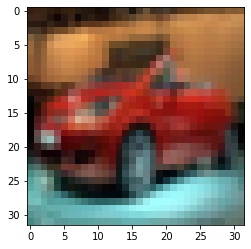

In [ ]:
plt.imshow(x_train[45])






### reshape

In [ ]:
y_train = y_train.reshape(-1, )

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [ ]:
def showImg(x, y, i):
  plt.figure(figsize=(10,2))
  plt.imshow(x[i])
  plt.xlabel(classes[y[i]])
  

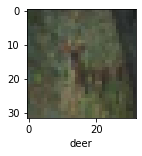

In [ ]:
showImg(x_train, y_train, 10)

In [ ]:
x_train = x_train/255
y_test = x_test/255



**Convolution Network**

In [ ]:
cnn = models.Sequential([
    # convolution
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    # max pooling
    layers.MaxPooling2D((2,2)),
    BatchNormalization(),
    # relu
    layers.Dense(64, activation ='relu'),
    # convolution
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    # max pooling
    layers.MaxPooling2D((2,2)),
    BatchNormalization(),
    # relu
    layers.Dense(64, activation ='relu'),
    # conv
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    # max pooling
    layers.MaxPooling2D((2,2)),
   

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # output
    layers.Dense(10, activation ='softmax')
])

In [ ]:
cnn.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=(['accuracy'])
)

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 98s 62ms/step - loss: 1.3973 - accuracy: 0.4942
Epoch 2/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.0589 - accuracy: 0.6217
Epoch 3/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9248 - accuracy: 0.6713
Epoch 4/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8431 - accuracy: 0.7006
Epoch 5/10
1563/1563 [==============================] - 98s 62ms/step - loss: 0.7861 - accuracy: 0.7236
Epoch 6/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.7292 - accuracy: 0.7451
Epoch 7/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.6887 - accuracy: 0.7567
Epoch 8/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.6528 - accuracy: 0.7705
Epoch 9/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.6242 - accuracy: 0.7811
Epoch 10/10
1563/1563 [==============================] - 97s 62m

In [ ]:
y_predict = cnn.predict(x_test)


313/313 [==============================] - 6s 18ms/step


In [ ]:
y_predict[9]

array([0.99999994, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [ ]:
y_predict = [np.argmax(arr) for arr in y_predict]


In [ ]:
y_test = y_test.reshape(-1, )

y_test[4]

0.43529411764705883

TypeError: ignored

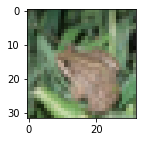

In [ ]:
showImg(x_test, y_test, 4)